In [26]:
%matplotlib inline
import numpy as np
import xarray as xr
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sys
sys.path.append('/Users/gbromley/code/python_utilities/')
from python_data_functions import extract_months
from scipy.interpolate import spline



In [2]:
data_dir = '/Users/gbromley/dropbox/CRUTS4.01/'
output_dir='/Users/gbromley/code/NGP_Climate/'
temp_file = 'cru_ts4.01.1901.2016.tmp.dat.nc'
nc_temp = xr.open_dataset(data_dir+temp_file)

ngp_mask = xr.open_dataset('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/ngp_mask.nc')

In [3]:
tmp = nc_temp['tmp']

In [4]:
ngp_mask = ngp_mask.rename({'__xarray_dataarray_variable__':'ngp'})

In [5]:
t_season='AMJ'
t_months=[4,5,6]
start_year = '1970-01-01'
end_year = '2015-12-01'
ext_e = -92
ext_w = -120
ext_n = 55
ext_s = 38

In [6]:
#extract the time period we are interested in
temp_subset=tmp.sel(time=slice(start_year,end_year))
#grab the months interested in
temp_months = temp_subset.sel(time=extract_months(temp_subset['time.month'],t_months[0],t_months[-1]))
#create month averages
temp_months_avg = temp_months.groupby('time.year').mean(dim='time')

#extract the 30 yr climate normal times
temp_30= tmp.sel(time=slice('1980-01-01','2011-01-01'))
#grab the months
temp_30_months = temp_30.sel(time=extract_months(temp_30['time.month'],t_months[0],t_months[-1]))
#create averages over months for climate normal
temp_30_climatology = temp_30_months.mean(dim='time')

In [7]:
#create 2d structure to hold slope
spatial_trend = tmp.isel(time=1).copy(deep=True)
spatial_trend.name = 't2m_trend'
spatial_trend.attrs['units'] = 'C per Decade'
spatial_trend.attrs['long_name'] = '2 meter temperature trend'

In [8]:
#calculate slope and pvalue for each grid point
#replace with a map() call?
corr_vals = np.arange(0,len(temp_months_avg))
corr_vals_2 = sm.add_constant(corr_vals)
for i in np.arange(0,len(tmp['lat'])):
    for j in np.arange(0,len(tmp['lon'])):
        series = temp_months_avg[:,i,j]
        anom = series - temp_30_climatology[i,j]
        model = sm.OLS(anom.values,corr_vals_2)
        #slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(corr_vals,anom.values)
        results = model.fit()
        slope = results.params[1]
        #t_value = ((slope - 0.02)/results.bse[1])
        #p_value = stats.t.cdf(t_value, results.df_resid)
       # p_value = stats.t.sf(results.tvalues[0], results.df_resid)
        spatial_trend[i,j]=slope*10
        #slope_scipy[i,j] = slope_2*10
        #pvalues[i,j]= p_value
        #print(i)

In [9]:
mask = ngp_mask['ngp']

In [44]:
mask

<xarray.DataArray 'ngp' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 -177.8 -177.2 -176.8 ...

In [10]:
ngp = spatial_trend.where(mask==1)

/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


In [11]:
ngp_stacked = ngp.stack(z =('lat','lon'))

In [12]:
ngp_trend = ngp_stacked.dropna('z').values

In [13]:
globe = spatial_trend.stack(z=('lat','lon'))

In [14]:
globe_trend = globe.dropna('z').values

In [124]:
xs = np.linspace(0,8,200)

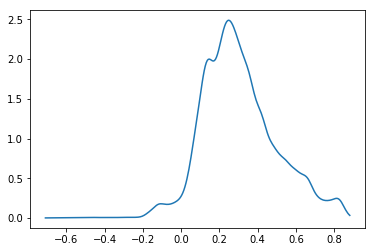

In [43]:
plt.plot(trend_vals,density_globe(trend_vals))

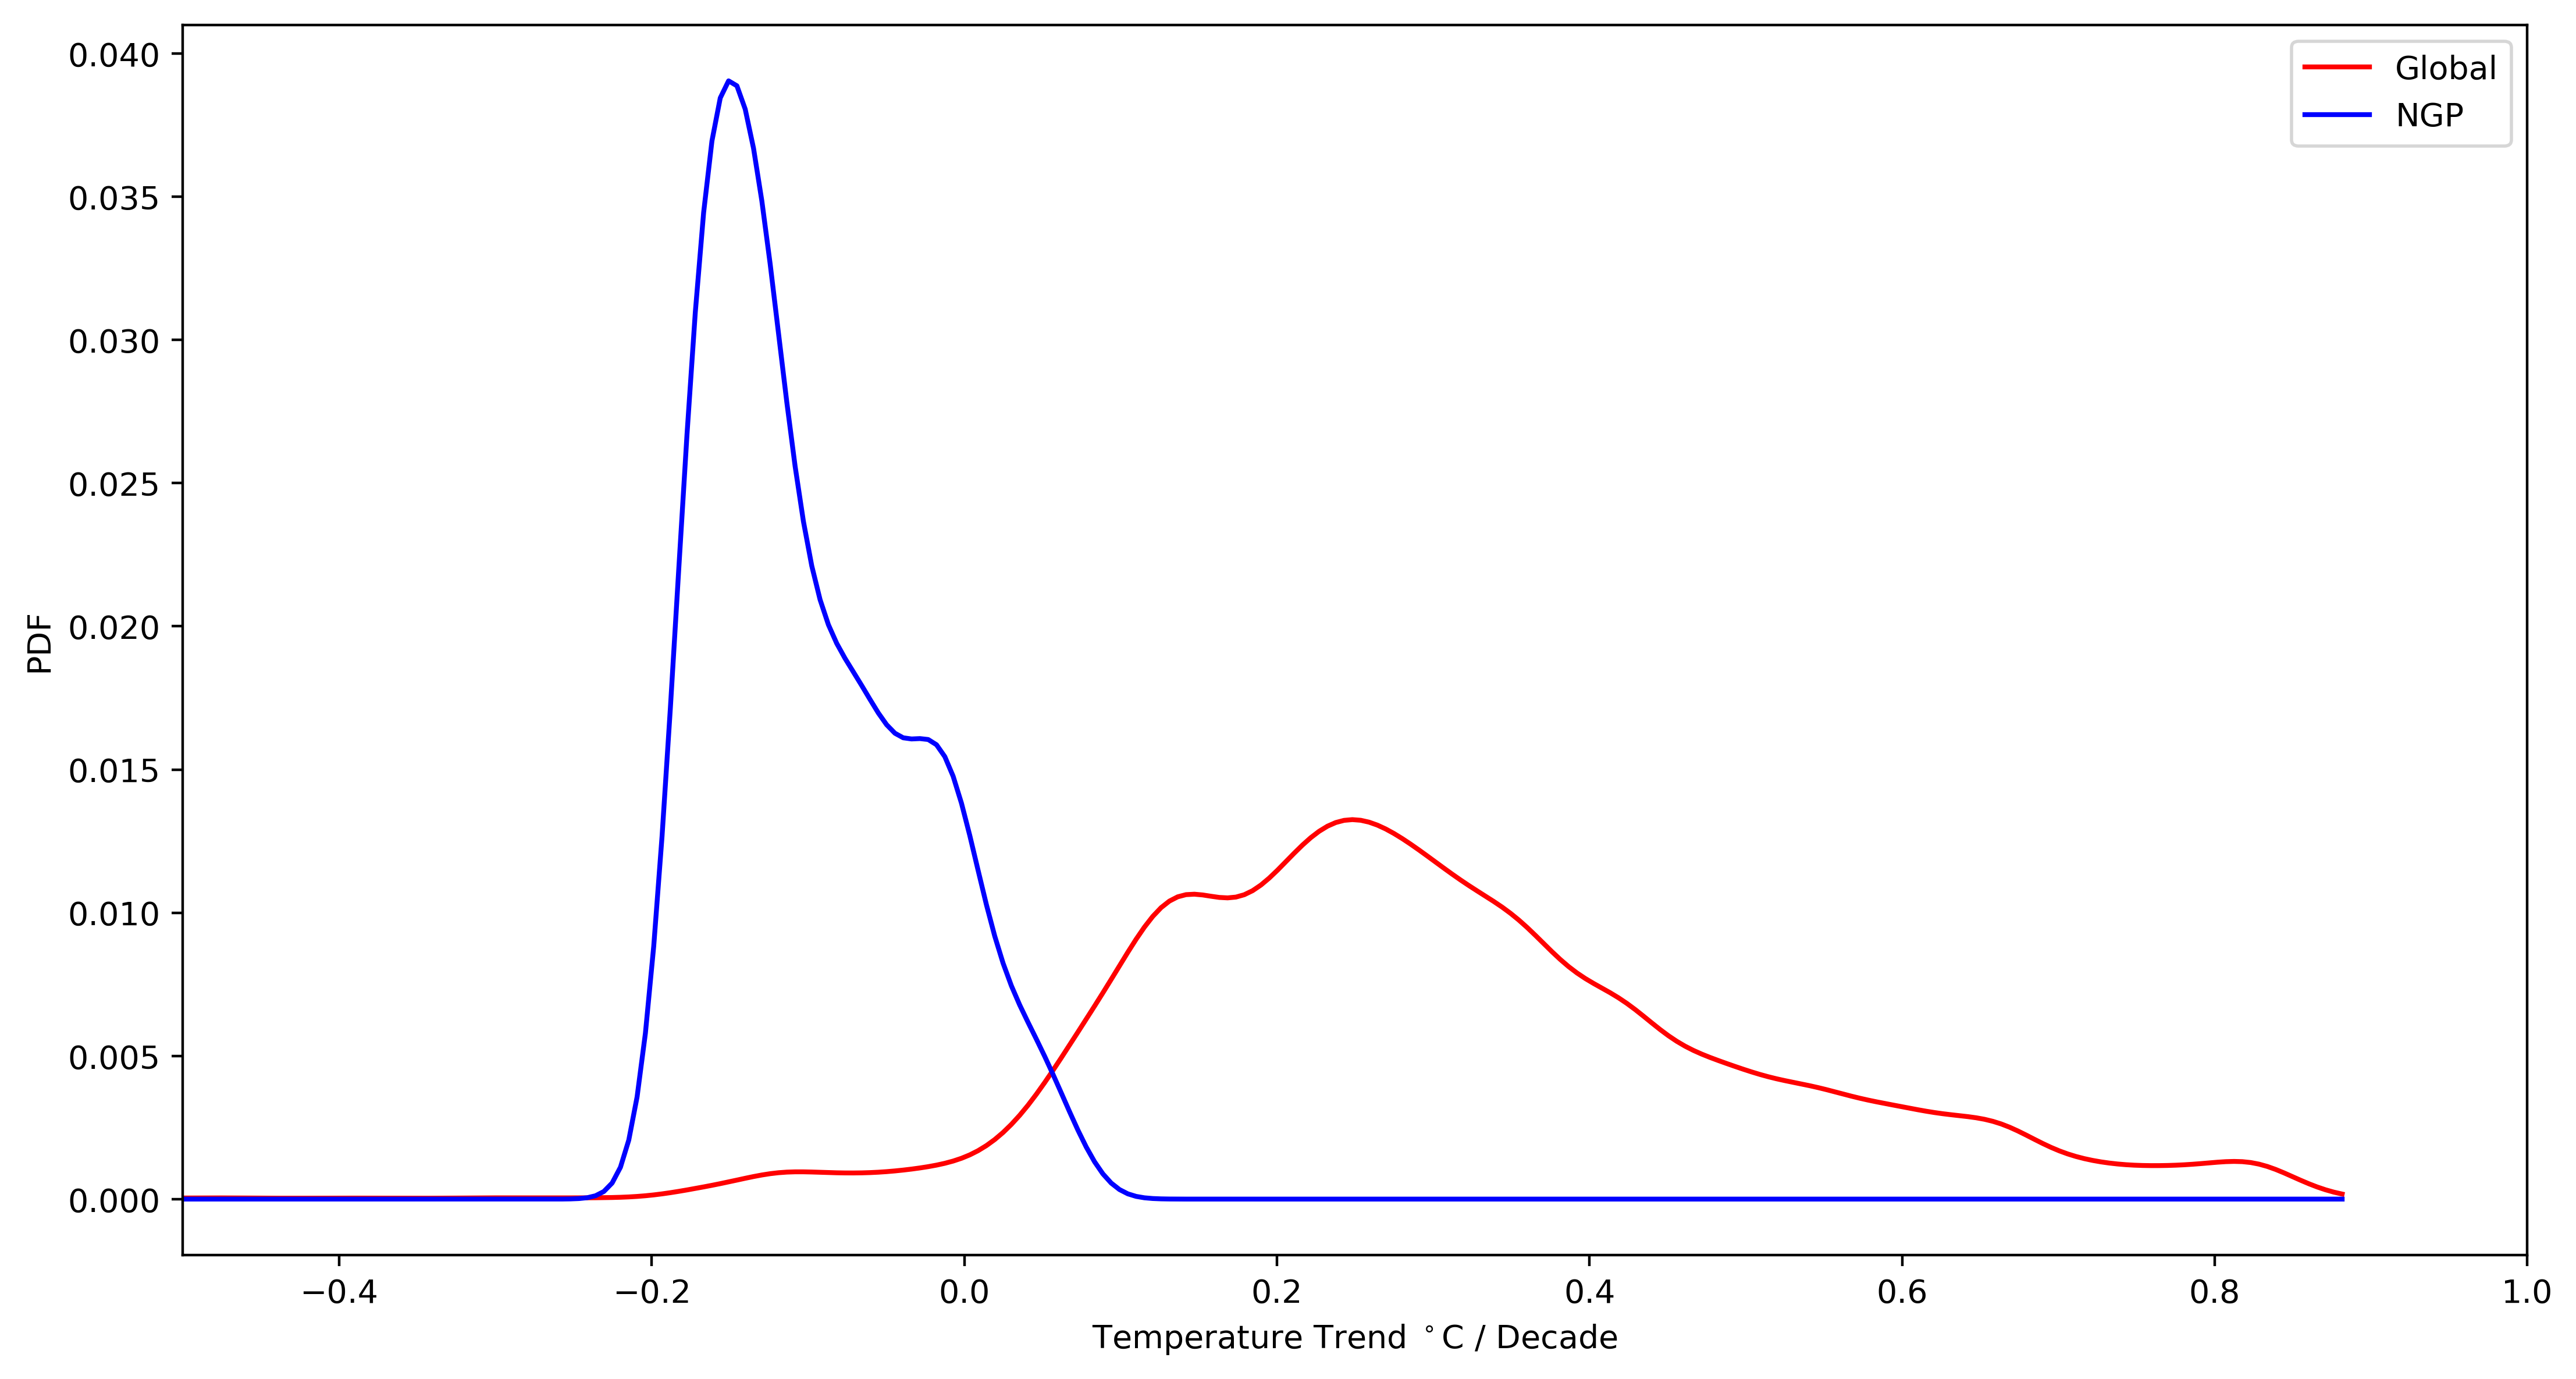

In [42]:
glob_hist = his

density_globe = sp.stats.gaussian_kde(globe_trend)
density_ngp = sp.stats.gaussian_kde(ngp_trend)
trend_vals = np.linspace(globe_trend.min(),globe_trend.max(),300)

pdf_globe = density_globe(trend_vals)/sum(density_globe(trend_vals))
pdf_ngp = density_ngp(trend_vals)/sum(density_ngp(trend_vals))
#print(gtrend_array_2)
#print(ngp_trend_array_2)
fig, ax = plt.subplots()
ax.plot(trend_vals,pdf_globe,label='Global',color='red')
ax.plot(trend_vals,pdf_ngp,label='NGP',color='blue')
ax.set_xlim([-.5,1])
ax.legend()
ax.set_xlabel('Temperature Trend $^\circ$C / Decade')
ax.set_ylabel('PDF')
#plt.xticks(bins_2)
#ax.set_xticks(np.arange(-1,-3),len(gtrend_array_2))
fig.set_size_inches(13,7)
fig.set_dpi(400)
#plt.savefig('/Users/gbromley/Dropbox/Montana_Climate_Project/NGP_Climatology_Paper/Figures/pdf_ngp_global.png')
plt.show()

In [32]:
kde1 = sp.stats.gaussian_kde(gtrend_array_2)

In [34]:
gtrend_array_2

array([4.44971818e-05, 7.41619697e-05, 1.33491546e-04, 7.41619697e-05,
       1.77988727e-04, 2.37318303e-04, 2.22485909e-04, 2.66983091e-04,
       1.33491546e-04, 2.52150697e-04, 1.77988727e-04, 1.77988727e-04,
       2.52150697e-04, 2.22485909e-04, 2.96647879e-04, 2.66983091e-04,
       1.42390982e-03, 3.04064076e-03, 6.34826461e-03, 5.39899140e-03,
       5.20617028e-03, 6.68940967e-03, 8.39513497e-03, 1.73835657e-02,
       3.41590033e-02, 4.88282409e-02, 6.73539009e-02, 6.04865025e-02,
       6.67754376e-02, 7.91456541e-02, 8.00800949e-02, 7.24265796e-02,
       6.40759419e-02, 5.93444082e-02, 4.64847226e-02, 4.38148917e-02,
       3.18748146e-02, 2.91159893e-02, 2.46959359e-02, 2.36428360e-02,
       2.00385642e-02, 1.84514981e-02, 1.73983981e-02, 1.47878968e-02,
       8.78077722e-03, 6.91189558e-03, 6.91189558e-03, 7.47552655e-03,
       8.26164343e-03, 1.77988727e-03])

In [35]:
bins_2


array([-0.70961048, -0.67778809, -0.64596571, -0.61414332, -0.58232093,
       -0.55049854, -0.51867616, -0.48685377, -0.45503138, -0.42320899,
       -0.3913866 , -0.35956422, -0.32774183, -0.29591944, -0.26409705,
       -0.23227467, -0.20045228, -0.16862989, -0.1368075 , -0.10498511,
       -0.07316273, -0.04134034, -0.00951795,  0.02230444,  0.05412683,
        0.08594921,  0.1177716 ,  0.14959399,  0.18141638,  0.21323876,
        0.24506115,  0.27688354,  0.30870593,  0.34052832,  0.3723507 ,
        0.40417309,  0.43599548,  0.46781787,  0.49964025,  0.53146264,
        0.56328503,  0.59510742,  0.62692981,  0.65875219,  0.69057458,
        0.72239697,  0.75421936,  0.78604174,  0.81786413,  0.84968652,
        0.88150891])

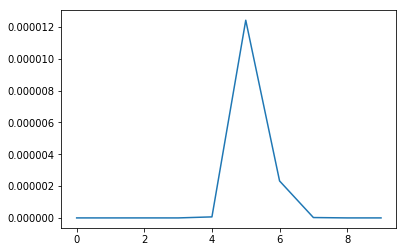

In [158]:
plt.plot(test)

([array([1.83030272e-04, 0.00000000e+00, 0.00000000e+00, 3.66060543e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.83030272e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 3.66060543e-04, 3.66060543e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.83030272e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         9.15151358e-04, 1.28121190e-03, 2.56242380e-03, 4.57575679e-03,
         4.39272652e-03, 5.49090815e-03, 5.85696869e-03, 7.32121087e-03,
         8.05333195e-03, 1.35442401e-02, 2.70884802e-02, 5.58242329e-02,
         2.08654510e-01, 5.04797489e-01, 1.16315738

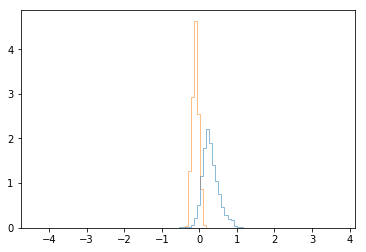

In [184]:
plt.hist([globe_trend,ngp_trend], bins=100,density=True,alpha=0.5,histtype='step')

In [145]:
len(ngp_trend)

636

In [146]:
len(globe_trend)

67420